In [1]:
# Load the saved model from a file
from tensorflow.keras.models import load_model
loaded_model = load_model('vit.h5')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

In [3]:
data_dir = 'CutmixSplitMonkeypoxSkinImageDataset'
img_size = (128, 128)
batch_size = 128

In [5]:
# Load a random image from the test set and make a prediction
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
test_generator = test_datagen.flow_from_directory(
        os.path.join(data_dir, 'test'),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse')  # Changed from 'categorical' to 'sparse'


Found 81 images belonging to 4 classes.


In [7]:
import cv2

In [10]:
test_images, test_labels = next(test_generator)
random_index = np.random.randint(0, 81)
random_image = test_images[random_index]
predicted_probabilities = loaded_model.predict(random_image.reshape(1, 128, 128, 3))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
print('Predicted class:', predicted_class)

1/1 [==============================] - 1s 699ms/step
Predicted class: 0


In [12]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 45ms/step


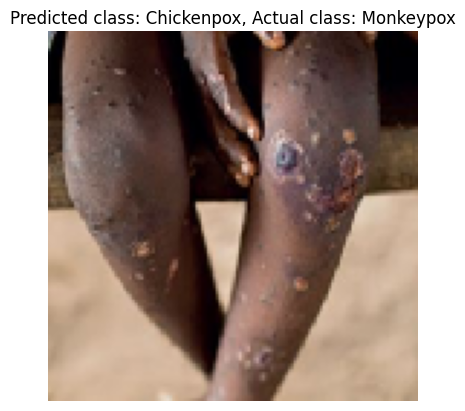

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

classes = list(test_generator.class_indices.keys())
all_image_paths = test_generator.filepaths
random_image_path = np.random.choice(all_image_paths)

# Load and resize the random image
random_image = image.load_img(random_image_path, target_size=(128, 128))
random_image_array = image.img_to_array(random_image) / 255.0

# Extract the actual class label of the random image
random_image_class = os.path.basename(os.path.dirname(random_image_path))

# Make a prediction on the random image
predicted_probabilities = loaded_model.predict(random_image_array.reshape(1, 128, 128, 3))
predicted_class = classes[np.argmax(predicted_probabilities)]

# Display the random image and the predicted class
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted class: {predicted_class}, Actual class: {random_image_class}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 47ms/step


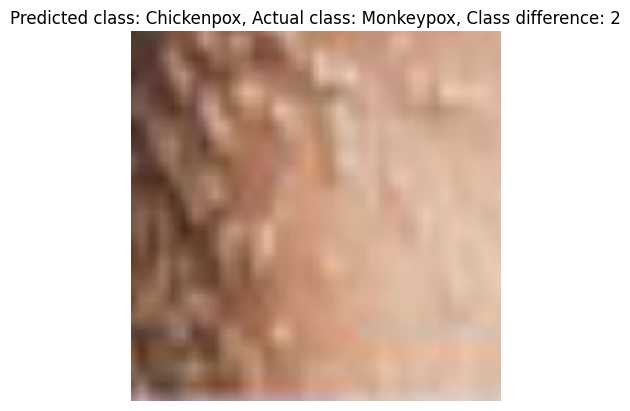

In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

classes = list(test_generator.class_indices.keys())
all_image_paths = test_generator.filepaths
random_image_path = np.random.choice(all_image_paths)

# Load and resize the random image
random_image = image.load_img(random_image_path, target_size=(128, 128))
random_image_array = image.img_to_array(random_image) / 255.0

# Extract the actual class label of the random image
actual_class = os.path.basename(os.path.dirname(random_image_path))

# Make a prediction on the random image
predicted_probabilities = loaded_model.predict(random_image_array.reshape(1, 128, 128, 3))
predicted_class = classes[np.argmax(predicted_probabilities)]

# Calculate the difference between the predicted and actual class
predicted_index = classes.index(predicted_class)
actual_index = classes.index(actual_class)
class_difference = abs(predicted_index - actual_index)

# Display the random image, predicted class, actual class, and class difference
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted class: {predicted_class}, Actual class: {actual_class}, Class difference: {class_difference}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 48ms/step


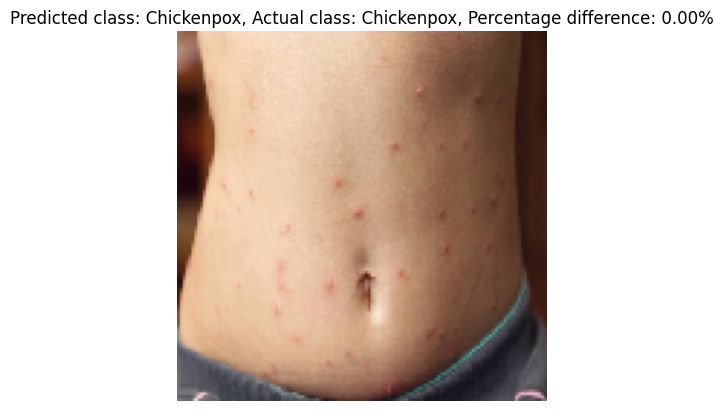

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

classes = list(test_generator.class_indices.keys())
all_image_paths = test_generator.filepaths
random_image_path = np.random.choice(all_image_paths)

# Load and resize the random image
random_image = image.load_img(random_image_path, target_size=(128, 128))
random_image_array = image.img_to_array(random_image) / 255.0

# Extract the actual class label of the random image
actual_class = os.path.basename(os.path.dirname(random_image_path))

# Make a prediction on the random image
predicted_probabilities = loaded_model.predict(random_image_array.reshape(1, 128, 128, 3))
predicted_class = classes[np.argmax(predicted_probabilities)]

# Calculate the percentage difference between the predicted and actual classes
predicted_index = classes.index(predicted_class)
actual_index = classes.index(actual_class)
num_classes = len(classes)
class_difference = abs(predicted_index - actual_index)
percentage_difference = class_difference / num_classes * 100

# Display the random image, predicted class, actual class, and percentage difference
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted class: {predicted_class}, Actual class: {actual_class}, Percentage difference: {percentage_difference:.2f}%")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 41ms/step


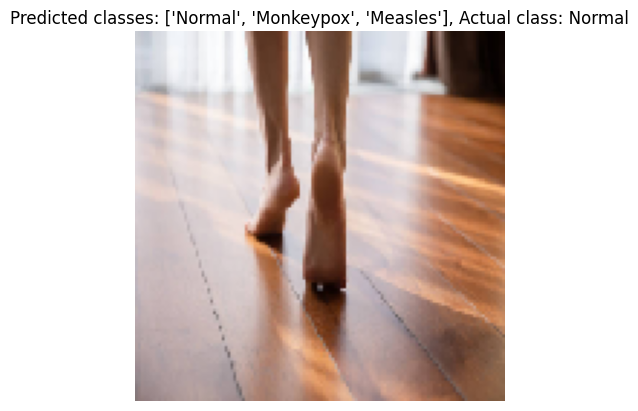

Prediction 1: Normal, Percentage difference: 0.00%
Prediction 2: Monkeypox, Percentage difference: 25.00%
Prediction 3: Measles, Percentage difference: 50.00%


In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

classes = list(test_generator.class_indices.keys())
all_image_paths = test_generator.filepaths
random_image_path = np.random.choice(all_image_paths)

# Load and resize the random image
random_image = image.load_img(random_image_path, target_size=(128, 128))
random_image_array = image.img_to_array(random_image) / 255.0

# Extract the actual class label of the random image
actual_class = os.path.basename(os.path.dirname(random_image_path))

# Make a prediction on the random image
predicted_probabilities = loaded_model.predict(random_image_array.reshape(1, 128, 128, 3))
predicted_indices = np.argsort(predicted_probabilities[0])[::-1][:3]
predicted_classes = [classes[i] for i in predicted_indices]

# Calculate the percentage differences between the predicted and actual classes
actual_index = classes.index(actual_class)
num_classes = len(classes)
percentage_differences = [abs(i - actual_index) / num_classes * 100 for i in predicted_indices]

# Display the random image, predicted classes, actual class, and percentage differences
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted classes: {predicted_classes}, Actual class: {actual_class}")
plt.axis('off')
plt.show()

for i in range(3):
    print(f"Prediction {i+1}: {predicted_classes[i]}, Percentage difference: {percentage_differences[i]:.2f}%")
